[Real or Fake] : Fake Job Description Prediction

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.
Acknowledgements

The University of the Aegean | Laboratory of Information & Communication Systems Security
http://emscad.samos.aegean.gr/
Inspiration

The dataset is very valuable as it can be used to answer the following questions:

    Create a classification model that uses text data features and meta-features and predict which job description     are fraudulent or real.
    Identify key traits/features (words, entities, phrases) of job descriptions which are fraudulent in nature.
    Run a contextual embedding model to identify the most similar job descriptions.
    Perform Exploratory Data Analysis on the dataset to identify interesting insights from this dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

#### Exploring dataset Analysis

In [5]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
##feture selection

df1=df[['title', 'location','company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','salary_range',
       'fraudulent']]


In [8]:
df1.isnull().sum()

title                      0
location                 346
company_profile         3308
requirements            2695
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
salary_range           15012
fraudulent                 0
dtype: int64

In [9]:
#seperate categorical data and numerical data

df_num=df.select_dtypes(include=['int64'])
df_cat=df.select_dtypes(include=['object'])

checking for missing values and outliers

In [10]:
#check dupplicate values

df1.duplicated().sum()

493

In [11]:
#drop the duplicate values


df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

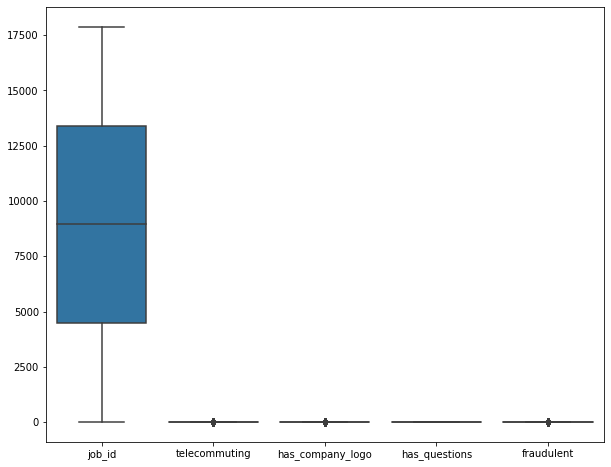

In [12]:
#checking outliers in numerical datas

plt.figure(figsize=(10,8))
sns.boxplot(data=df_num)
plt.show()

In [13]:
#Removing Outliers from columns
df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]

In [14]:
df1.shape

(17387, 14)

In [15]:
#remove missing values
df1.dropna(inplace=True)
df1.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64

In [16]:
df1.shape

(1485, 14)

### visualization to analyse data

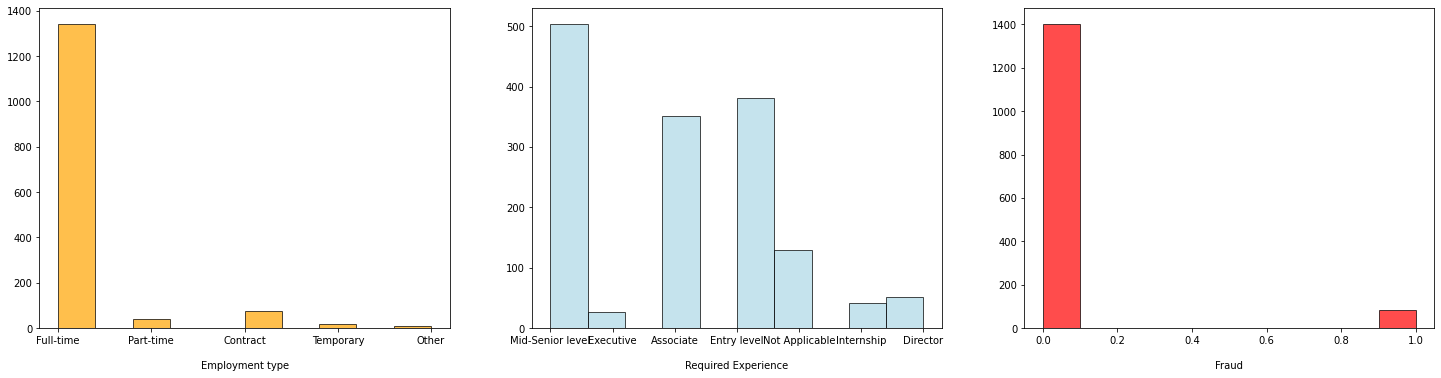

In [17]:
#plot to see distribution of the continous features individually

plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
plt.hist(df1.employment_type, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nEmployment type')

plt.subplot(3,3,2)
plt.hist(df1.required_experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nRequired Experience')

plt.subplot(3,3,3)
plt.hist(df1.fraudulent, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nFraud')


plt.show()


-Full time job are posted more rather than other type of employemnt type

-More job available that required Mid senior level experience

<AxesSubplot:xlabel='function', ylabel='count'>

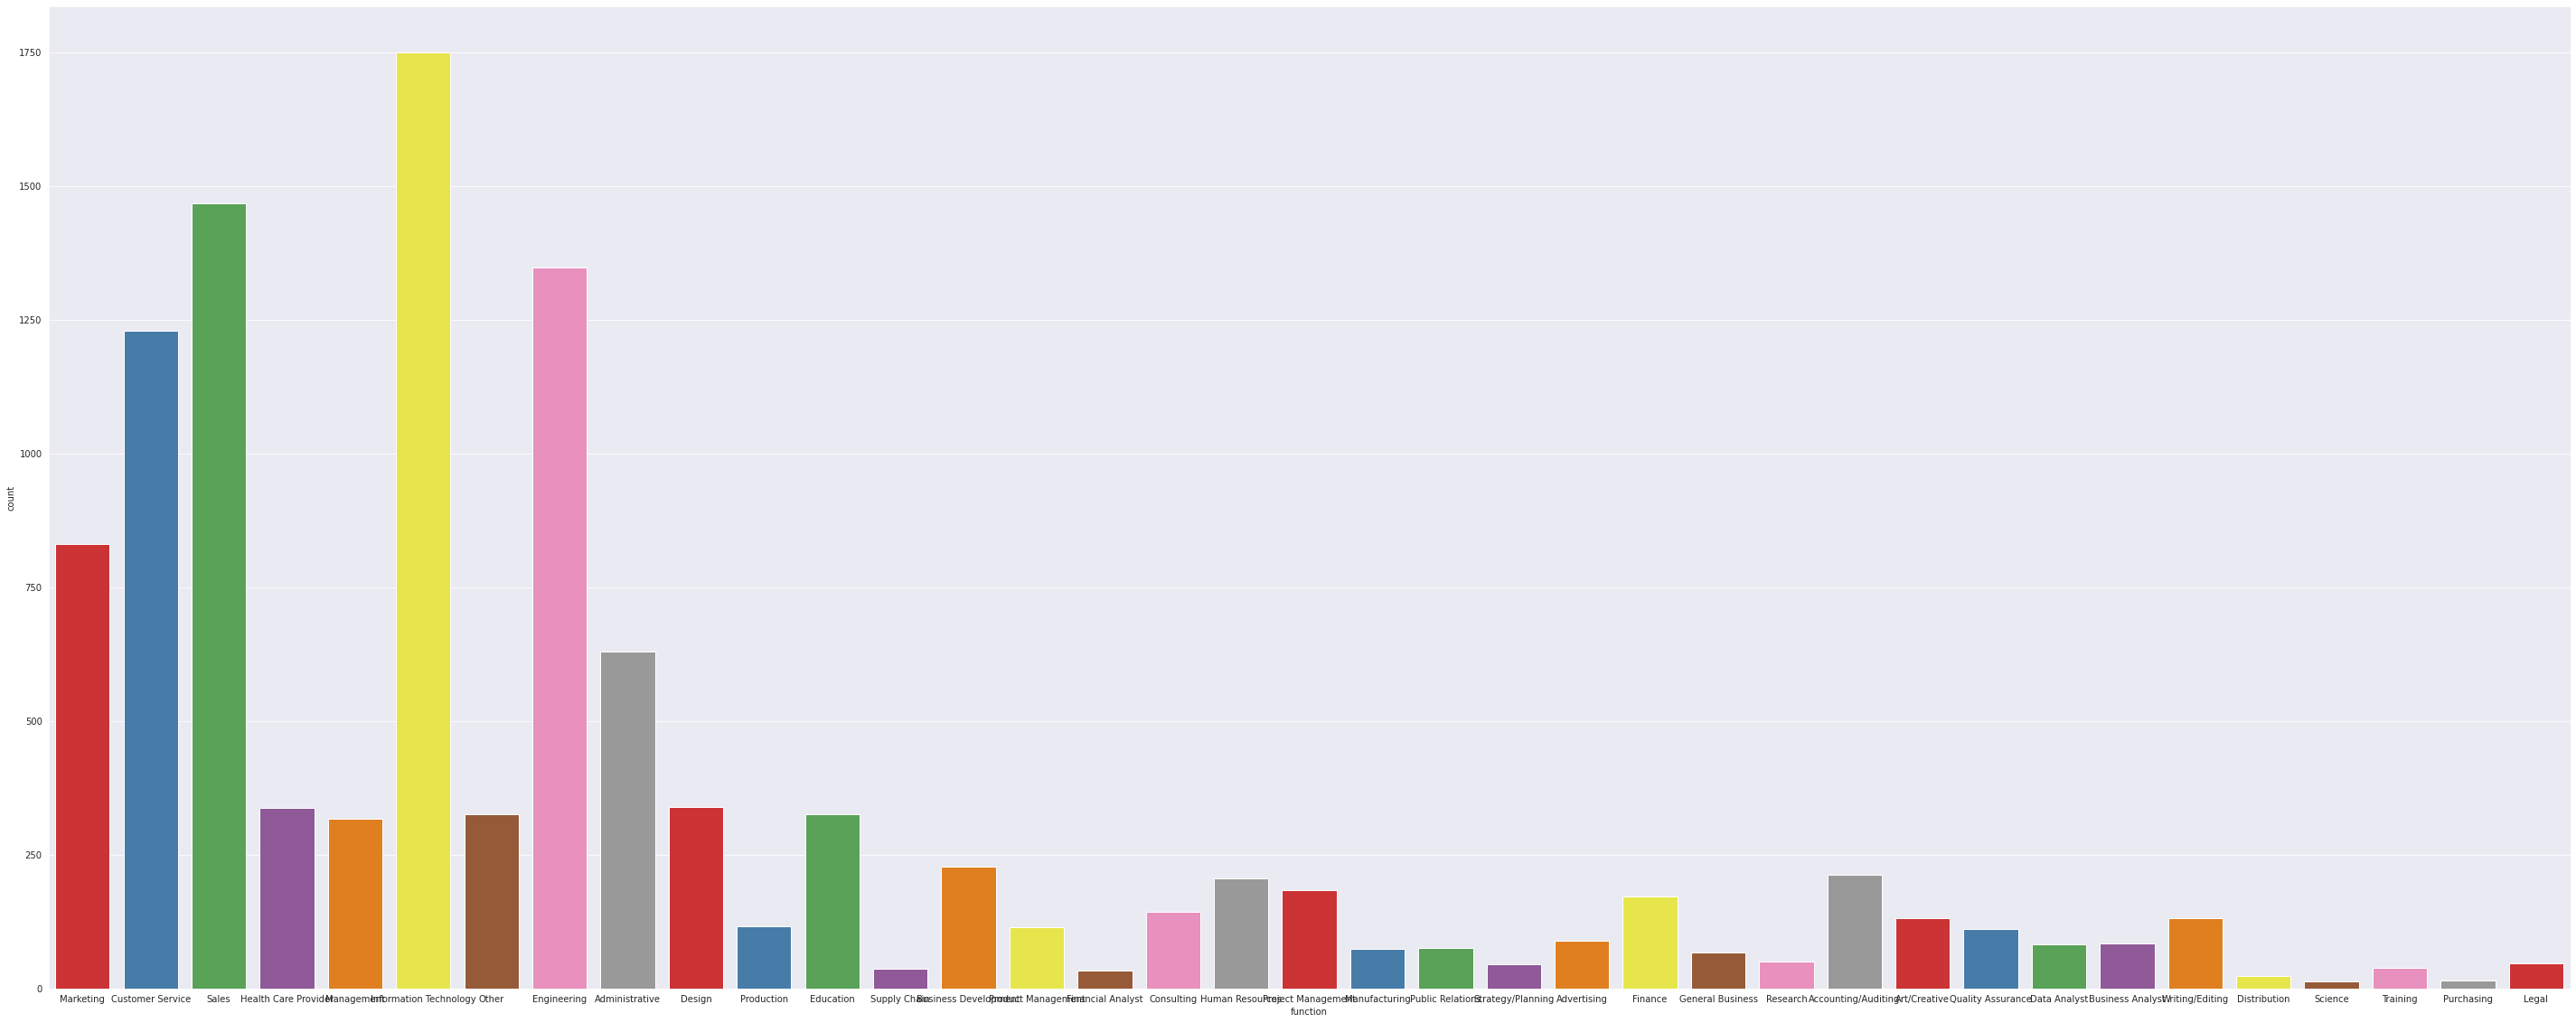

In [18]:
#plot maximum number of job in which field

plt.figure(figsize=(50,20))
sns.set_style("darkgrid")
sns.countplot(x='function',data=df,palette='Set1')

-Maximum number of jobs are posted in IT field and Minimum jobs are posted related to purchasing,science and    
Distribution

-jobs inSales,IT,Marketing,Engineering,Customer Service,Administrative are most in deamnd jobs

#### job titles which have most full time job oppportunities and how many

In [19]:
## job titles which have most full time job oppportunities and how many

## subsetting dataframe which have Full time employemnt type and are not a fraud

df_jobs=df1[(df1['employment_type']=='Full-time')&(df1['fraudulent']==0)]
df_jobs['title'].value_counts()
 

Agent-Inbound Sales Position               12
Marketing Manager                           8
Customer Service Representative             8
Technical Support Associate                 7
Web Developer                               7
                                           ..
Sales - General Manager (London)            1
Customer Service Advisor                    1
WordPress Developers                        1
Sales and Marketing Intern                  1
Frontend UX / Magento Themes Developer      1
Name: title, Length: 1027, dtype: int64

In [20]:
df_jobs['title'].value_counts().max()

12

<AxesSubplot:title={'center':'Top job title with full time '}>

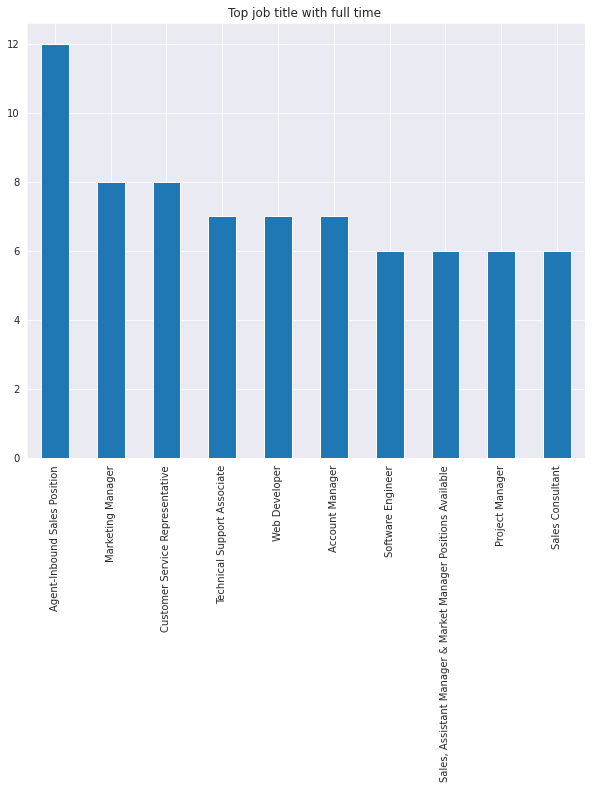

In [21]:
#plot

s = df_jobs['title'].value_counts()

s.head(n=10).plot.bar(figsize =(10, 8), title = "Top job title with full time ")


-Job title 'Agent Inbound sales position' has 12 opportunities for a full time job

In [22]:
## required eduaction for both
df1['required_education'].value_counts()

Bachelor's Degree                    739
High School or equivalent            289
Unspecified                          262
Associate Degree                      68
Master's Degree                       45
Certification                         28
Some College Coursework Completed     20
Professional                          13
Vocational                            13
Doctorate                              3
Vocational - HS Diploma                2
Some High School Coursework            2
Vocational - Degree                    1
Name: required_education, dtype: int64

#### Most Required eduaction for Real job post

<AxesSubplot:title={'center':'Top Required Education for Real job post  '}>

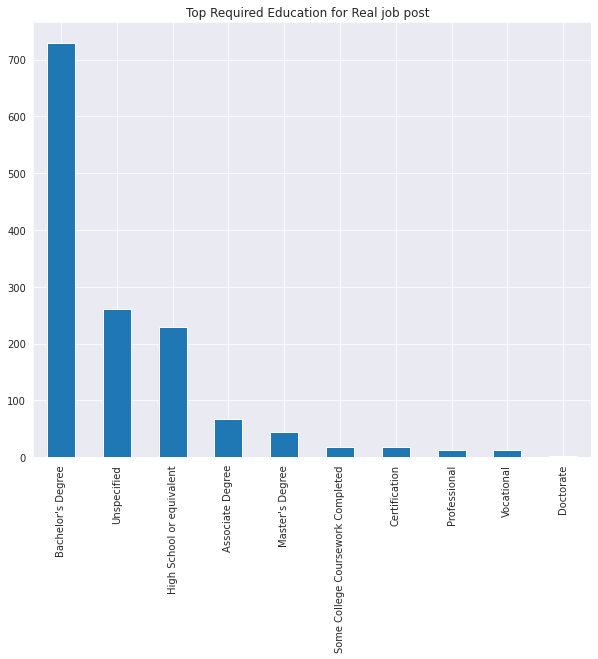

In [23]:
df_ed=df1[df1['fraudulent']==0]

s_ed = df_ed['required_education'].value_counts()

s_ed.head(n=10).plot.bar(figsize =(10, 8), title = "Top Required Education for Real job post  ")


-Most Required Education : Bachelor's Degree

#### which industry has max number of fake jobs

In [24]:
df_industry=df1[df1['fraudulent']==1]
print(df_industry.shape)
print()

df_industry['industry'].value_counts().max()



(82, 14)



19

<AxesSubplot:title={'center':'Top Industry with maximum Fake job post '}>

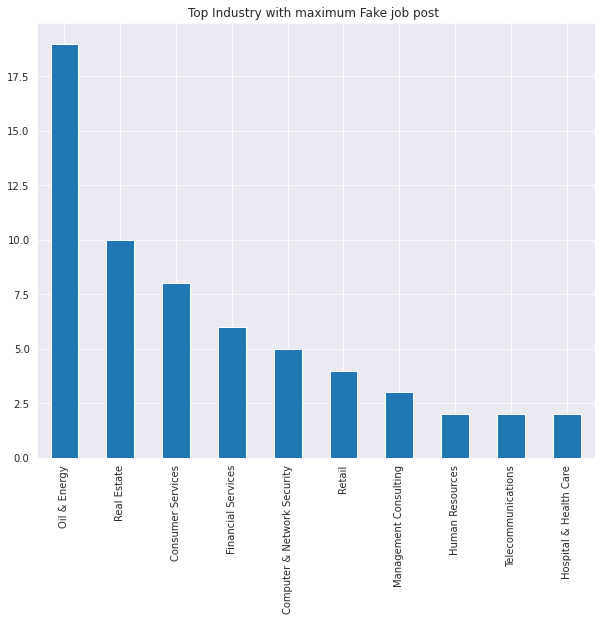

In [25]:
s_ind = df_industry['industry'].value_counts()

s_ind.head(n=10).plot.bar(figsize =(10, 8), title = "Top Industry with maximum Fake job post ")




-Industry with maximum Fake job postings at 'oil & Energy' industry with max 19 

### Checking Imbalancing

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

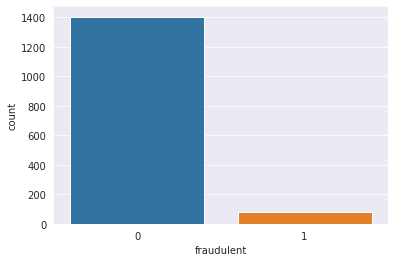

In [26]:
sns.countplot(x='fraudulent',data=df1)

In [27]:
real=df1[df1['fraudulent']==0]
real.shape

(1403, 14)

In [28]:
fake=df1[df1['fraudulent']==1]
fake.shape

(82, 14)

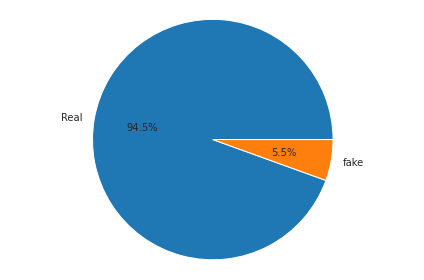

In [29]:
labels=['Real','fake']
sizes=[df1['fraudulent'].value_counts()[0],df1['fraudulent'].value_counts()[1]]
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%')
ax1.axis('equal')
plt.tight_layout()
plt.show()

This shows imbalancing dataset

-oversampling fake dataframe inorder to get balnced dataset

In [30]:
fake=fake.sample(1403,replace=True)
fake.shape,real.shape

((1403, 14), (1403, 14))

In [31]:
df1=fake.append(real)
df1.reset_index()
# df1.head()
df1.shape

(2806, 14)

### Balanced dataset

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

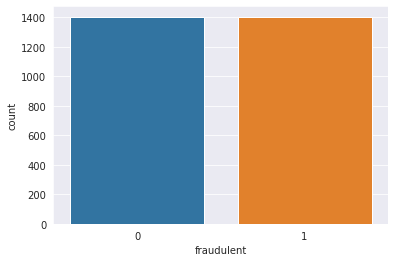

In [32]:

sns.countplot(x='fraudulent',data=df1)

### label encoding


In [33]:
from sklearn.preprocessing import LabelEncoder

job=pd.DataFrame(df1)
job.head()

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
845,Service Associate,"US, TX, AUSTIN",The Accion story began more than 100 years ag...,1 year applicable retail/customer service work...,0,1,1,Full-time,Entry level,High School or equivalent,Retail,Customer Service,25000-30000,1
5808,Employee Relations Specialist,"US, TX, Austin",As the industry’s largest supply contracting c...,Minimum of three (3) years of work Novationoff...,0,1,1,Full-time,Entry level,High School or equivalent,Human Resources,Administrative,35000-45000,1
3609,Customer Service Representative,"US, GA, Atlanta",Gary Cartwright established Cartwright Propert...,Home Computer with Internet AccessBasic Comput...,1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,30000-50000,1
7570,Production Assistant,"US, TX, Houston","Founded in 1993, our group has, in a few short...",Flexible ScheduleNo professional knowledge re...,0,1,1,Full-time,Not Applicable,Unspecified,Media Production,Manufacturing,30000-34000,1
11628,Sales Professional- SMB (Full-Time),"US, MD, Baltimore",Making Mobile Device Management Clear is Clear...,Job Requirements High School Diploma or GEDPas...,0,1,0,Full-time,Entry level,High School or equivalent,Computer & Network Security,Sales,21600-31200,1


In [34]:
le = LabelEncoder()
job['title'] = le.fit_transform(job['title'])
job['location'] = le.fit_transform(job['location'])
job['company_profile'] = le.fit_transform(job['company_profile'])
job['requirements'] = le.fit_transform(job['requirements'])
job['employment_type'] = le.fit_transform(job['employment_type'])
job['required_experience'] = le.fit_transform(job['required_experience'])
job['required_education'] = le.fit_transform(job['required_education'])
job['industry'] = le.fit_transform(job['industry'])
job['function'] = le.fit_transform(job['function'])
job['salary_range'] = le.fit_transform(job['salary_range'])


In [35]:
job=job.reset_index()
job.head()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,845,1015,393,326,30,0,1,1,1,2,4,80,7,222,1
1,5808,335,395,49,637,0,1,1,1,2,4,41,1,302,1
2,3609,238,285,161,544,1,1,0,1,2,4,75,7,270,1
3,7570,801,408,150,1270,0,1,1,1,6,9,58,21,257,1
4,11628,920,319,224,576,0,1,0,1,2,4,12,31,194,1


In [36]:
##split dataset into train,test

In [37]:
x=job.drop(['fraudulent','index'],axis=1).values
y=job['fraudulent'].values


In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=11)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((2104, 13), (702, 13), (2104,), (702,))

Apply 3 different algorithm to ge maximum possible accuracy score

1.Logistic Regression

2.RandomForest

3.KNN

4.XGBoost


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score

#### Logistic Regression

In [40]:
log=LogisticRegression()
log.fit(xtrain,ytrain)

log_pred=log.predict(xtest)

ytest.shape,log_pred.shape

((702,), (702,))

In [41]:
df_log=pd.DataFrame({'ytest':ytest,'predicted':log_pred})
df_log.head()
    

,ytest,predicted
0,0,0
1,0,0
2,1,0
3,1,0
4,0,1


In [42]:
def model_report(ytest,ypred):
    
    print()
    print('Accuracy score:',accuracy_score(ytest,ypred))
    print('precision score:',precision_score(ytest,ypred))
    print('Recall score:',recall_score(ytest,ypred))
    print()
    print('classification report:\n',classification_report(ytest,ypred))
    print('confusion matrix:\n',confusion_matrix(ytest,ypred))
    pass

In [43]:
log_score=model_report(ytest,log_pred)
log_score


Accuracy score: 0.594017094017094
precision score: 0.5765765765765766
Recall score: 0.5714285714285714

classification report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61       366
           1       0.58      0.57      0.57       336

    accuracy                           0.59       702
   macro avg       0.59      0.59      0.59       702
weighted avg       0.59      0.59      0.59       702

confusion matrix:
 [[225 141]
 [144 192]]


## RandomForest classifier

In [44]:
rf=RandomForestClassifier().fit(xtrain,ytrain)
rf_pred=rf.predict(xtest)

df_rf=pd.DataFrame({'ytest':ytest,'predicted':log_pred})
df_rf.head()
    

,ytest,predicted
0,0,0
1,0,0
2,1,0
3,1,0
4,0,1


In [45]:
rf_score=model_report(ytest,rf_pred)
rf_score


Accuracy score: 0.9985754985754985
precision score: 0.9970326409495549
Recall score: 1.0

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       336

    accuracy                           1.00       702
   macro avg       1.00      1.00      1.00       702
weighted avg       1.00      1.00      1.00       702

confusion matrix:
 [[365   1]
 [  0 336]]


### KNN classifier

In [46]:
knn=KNeighborsClassifier().fit(xtrain,ytrain)
knn_pred=knn.predict(xtest)

df_knn=pd.DataFrame({'ytest':ytest,'predicted':knn_pred})
df_knn.head()

,ytest,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0


In [47]:
knn_score=model_report(ytest,knn_pred)
knn_score


Accuracy score: 0.9316239316239316
precision score: 0.875
Recall score: 1.0

classification report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       366
           1       0.88      1.00      0.93       336

    accuracy                           0.93       702
   macro avg       0.94      0.93      0.93       702
weighted avg       0.94      0.93      0.93       702

confusion matrix:
 [[318  48]
 [  0 336]]


### XGBOOST

In [48]:
xgb=xgb.XGBClassifier(objective='binary:logistic',missing=1,seed=42)
xgb.fit(xtrain,ytrain,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(xtest,ytest)])


xgb_pred=xgb.predict(xtest)

df_xgb=pd.DataFrame({'ytest':ytest,'predicted':xgb_pred})
df_xgb.head()

[0]	validation_0-aucpr:0.93635
[1]	validation_0-aucpr:0.93678
[2]	validation_0-aucpr:0.93732
[3]	validation_0-aucpr:0.96213
[4]	validation_0-aucpr:0.97814
[5]	validation_0-aucpr:0.98661
[6]	validation_0-aucpr:0.99340
[7]	validation_0-aucpr:0.99382
[8]	validation_0-aucpr:0.99766
[9]	validation_0-aucpr:0.99799
[10]	validation_0-aucpr:0.99910
[11]	validation_0-aucpr:0.99934
[12]	validation_0-aucpr:0.99917
[13]	validation_0-aucpr:0.99916
[14]	validation_0-aucpr:0.99949
[15]	validation_0-aucpr:0.99954
[16]	validation_0-aucpr:0.99957
[17]	validation_0-aucpr:0.99948
[18]	validation_0-aucpr:0.99960
[19]	validation_0-aucpr:0.99973
[20]	validation_0-aucpr:0.99978
[21]	validation_0-aucpr:0.99983
[22]	validation_0-aucpr:0.99982
[23]	validation_0-aucpr:0.99982
[24]	validation_0-aucpr:0.99977
[25]	validation_0-aucpr:0.99983
[26]	validation_0-aucpr:0.99988
[27]	validation_0-aucpr:0.99999
[28]	validation_0-aucpr:0.99999
[29]	validation_0-aucpr:0.99994
[30]	validation_0-aucpr:0.99994
[31]	validation_0-

,ytest,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0


In [49]:
xgb_score=model_report(ytest,xgb_pred)
xgb_score


Accuracy score: 0.9886039886039886
precision score: 0.9767441860465116
Recall score: 1.0

classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       366
           1       0.98      1.00      0.99       336

    accuracy                           0.99       702
   macro avg       0.99      0.99      0.99       702
weighted avg       0.99      0.99      0.99       702

confusion matrix:
 [[358   8]
 [  0 336]]


## check precision score and accuracy score


In [50]:
model_score=pd.DataFrame({'Models':['Logistic','KNN','RandomForest','XGBoost'],
                         'Precision_score':[precision_score(ytest,log_pred),precision_score(ytest,knn_pred),
                                           precision_score(ytest,rf_pred),precision_score(ytest,xgb_pred)],
                         'Accuracy_score':[accuracy_score(ytest,log_pred),accuracy_score(ytest,knn_pred),
                                          accuracy_score(ytest,rf_pred),accuracy_score(ytest,xgb_pred)]})
                            
model_score.sort_values(by='Precision_score',ascending=False)

,Models,Precision_score,Accuracy_score
2,RandomForest,0.997033,0.998575
3,XGBoost,0.976744,0.988604
1,KNN,0.875000,0.931624
0,Logistic,0.576577,0.594017


RandomForest confusionMatrix


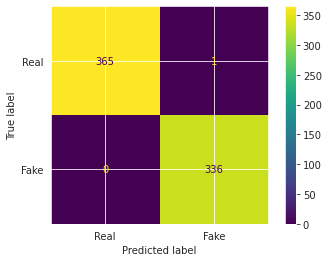

In [57]:
from sklearn.metrics import plot_confusion_matrix

print('RandomForest ConfusionMatrix')
plot_confusion_matrix(rf,xtest,ytest,values_format='d',display_labels=['Real','Fake'])

### Accuracy score RandomForest classification algorithm: 99.7%

As per accuracy score RandomForest Classification Algorithm has highest accuracy score 

Also as per Precision score RandomForest Classification Algorithm has highest precision score

so for given Dataset RandomForest algm is best suitable to use